## 도수분포표

자료를 크기수능로 배열할 때 특정한 자료의 값이 반복되어서 나오는 경우, 반복되는 횟수를 그 값의 도수(frequency)라고 한다.  
따라서 자료의 값과 도수를 정리한 표를 도수분포표(frequency table)이라고 한다.

*예시

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = np.random.randint(1, 10, size = 30)
print(data)

[3 7 1 5 9 2 4 7 6 1 5 9 8 3 1 6 2 7 4 2 3 7 1 2 5 8 2 7 4 1]


1부터 9까지의 값을 갖는 30개의 난수를 생성합니다.

In [6]:
data_Series = pd.Series(data)
data_frequency = data_Series.value_counts()
data_frequency

7    5
1    5
2    5
3    3
5    3
4    3
9    2
6    2
8    2
dtype: int64

시리즈로 변환 후 기본적인 도수분포를 알기 위하여 .value_counts()함수를 사용한다.  
좀 더 예쁘게 보기 위하여 아래와 같이 내용을 추가하여 본다.

In [7]:
#백분율 구하기
data_Percent = ((data_frequency / data_frequency.sum()) * 100).round(2)
data_Percent

#데이터 병합
data_frequency_table = pd.concat([data_frequency, data_Percent], axis = 1)
data_frequency_table.columns = ['도수', '백분율(%)']
data_frequency_table

,도수,백분율(%)
7,5,16.67
1,5,16.67
2,5,16.67
3,3,10.00
5,3,10.00
4,3,10.00
9,2,6.67
6,2,6.67
8,2,6.67


시리즈를 합치기 위하여 concat을 사용하였으며 row형태가 아닌 column 형태로 합치기 위하여 axis를 기본 값이 0이 아닌 1로 설정한다.  
여기서 좀 더 예쁘게 하기 위하여 계급(index)을 정렬 후 합계 행을 추가하여 본다.

In [8]:
#인덱스 기준 테이블 정렬
sorted_table = data_frequency_table.sort_index()

#마지막 합계 행 추가
total_Series = pd.Series([30, 100], name = "합계", index = ['도수', '백분율(%)'])
final_table = sorted_table.append(total_Series)
final_table

,도수,백분율(%)
1,5,16.67
2,5,16.67
3,3,10.00
4,3,10.00
5,3,10.00
6,2,6.67
7,5,16.67
8,2,6.67
9,2,6.67
합계,30,100.00


## 막대 그래프

막대 그래프는 데이터가 단일변수 자료이며, 계급이 사과, 배 등과 같은 크기를 측정할수 없는 범주형 자료를 시각화한 그래프이다.  
범주형 자료(질적 변수)는 순서와 크기가 의미 없는 명목형 변수와 의미가 있는 순서형(서열) 변수가 있다.

*예시

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
# matplotlib 한글화
import koreanize_matplotlib

#경고 무시
import warnings
warnings.filterwarnings('ignore')

#### x축 기준 막대그래프

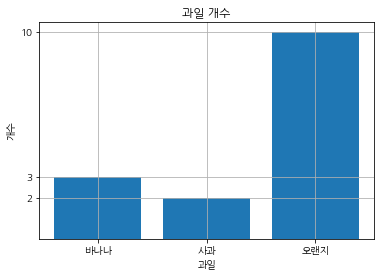

In [32]:
data = {
    '바나나' : 3, '사과' : 2, '오랜지' :10
}

# 선 : plot , 바 : bar
# print(data.keys(), data.values())
plt.bar([0,1,2], data.values())
plt.title('과일 개수')
plt.xticks([0, 1, 2], data.keys())
plt.yticks(sorted(data.values()))
plt.grid(True)
plt.xlabel('과일')
plt.ylabel('개수')
plt.show()

<ol>
      <li>bar: 막대의 개수만큼의 리스트와 범주의 도수값을 입력한다.</li>
      <li>title: 그래프 제목</li>
      <li>xticks: 범주명을 입력한다.</li>
      <li>yticks: 도수들을 표시한다. 위와 같이 y축은 증가하는 형태로 2,3,10으로 가기 때문에 sorted를 통하여 입력하여 한다.</li>
      <li>grid: 눈금선을 표현한다.</li>
      <li>xlabel: y축 도수</li>
      <li>ylabel: x축 계급</li>
      <li>show: 그래프 시각화</li>
</ol>

#### y축 기준 막대그래프
다양한 예시를 위하여 Series 사용

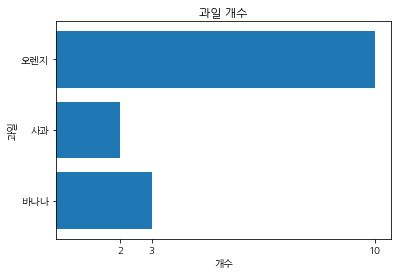

In [43]:
sample = pd.Series([3, 2, 10], index=["바나나", "사과", "오렌지"], name = "과일 개수")

sample.values
plt.barh([0,1,2], sample.values)
plt.title(sample.name)
plt.xticks(sorted(sample.values))
plt.yticks([0,1,2], sample.index)
plt.ylabel('과일')
plt.xlabel('개수')
plt.show()

x축과 y축의 전환 기준은 bar가 아닌 barh와 ticks를 통하여 하면 된다.  
좀 더 자세한 색상 등은 참고 [막대 그래프 참조](https://wikidocs.net/92095)을 이용한다.

## 히스토그램

히스토그램은 데이터가 단일변수 자료이며, 계급이 숫자와 같이 계산이 가능한 연속형 변수를 범주화 시켜 자료를 시각화한 그래프이다.  
양적 변수는 일반적인 연속형 변수와 이산형 변수가 있다.

히스토그램에서 제일 중요한 것은 계급값을 나누는 방법이다.
손으로 계급값을 구할 경우에는

$$ (max - min) \div 계급 수 = \lceil x \rceil$$

최소+x 이상 ~ 최대+x 미만으로 범위를 설정한다.  

올림을 하는 이유는 x가 정확히 딱 떨어졌을 경우에 맨 마지막 범위에서 데이터 최대값과 최대 x값이 같아서 데이터의 최대값이 도수에 포함되지 않는 경우가 발생하기 때문이다.

*예시

In [136]:
#데이터
heights = [168, 181, 164, 156, 178, 174, 161,
           177, 166, 168, 159, 171, 180, 159,
           167, 181, 169, 173, 169, 174, 170,
           165]

#범주 만들기 10
frequency_range = (max(heights) - min(heights))/10
print(type(frequency_range))

x = min(heights)
count = 1
range_list = []
range_list.append(x)           #맨 처음 시작 값을 넣어준다.
for i in range(10):
    print("범위{0}: {1}이상 ~ {2}미만".format(count, x, x + frequency_range))
    x = x + frequency_range
    range_list.append(x)       #경계값을 계속 더한다.
    count = count + 1
range_list

<class 'float'>
범위1: 156이상 ~ 158.5미만
범위2: 158.5이상 ~ 161.0미만
범위3: 161.0이상 ~ 163.5미만
범위4: 163.5이상 ~ 166.0미만
범위5: 166.0이상 ~ 168.5미만
범위6: 168.5이상 ~ 171.0미만
범위7: 171.0이상 ~ 173.5미만
범위8: 173.5이상 ~ 176.0미만
범위9: 176.0이상 ~ 178.5미만
범위10: 178.5이상 ~ 181.0미만


[156, 158.5, 161.0, 163.5, 166.0, 168.5, 171.0, 173.5, 176.0, 178.5, 181.0]

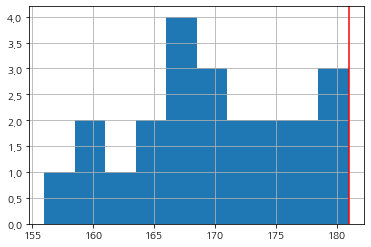

In [137]:
#직접 만든 범위로 그래프 그리기
plt.hist(heights, bins= range_list, label='heigths')
plt.axvline(181, color = 'red', alpha = 1) #마지막을 보기 위하여 빨간색 축으로 표시 
plt.grid(True)
plt.show()

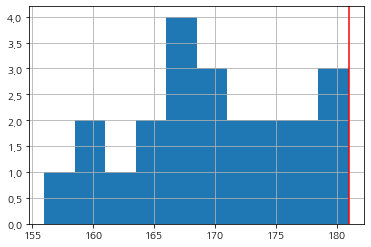

[1. 2. 1. 2. 4. 3. 2. 2. 2. 3.]
[156.  158.5 161.  163.5 166.  168.5 171.  173.5 176.  178.5 181. ]
<BarContainer object of 10 artists>


In [138]:
#bins를 통하여 10개로 나누기

n, bins, patches = plt.hist(heights, bins=10, label='heigths')
plt.axvline(181, color = 'red', alpha = 1)
plt.grid(True)
plt.show()

print(n)
print(bins)
print(patches)

<ul>
    <li>n: 각 구간에 있는 빈도 수</li>
    <li>bins: 구간의 경계값 리스트</li>
    <li>patches: 각 구간을 그리는 matplotlib patch 객체 리스트</li>
</ul>
range_list와 bins의 값이 실제로 같은 것을 확인할 수 있다.  

hist에서 좀 더 살펴볼 속성으로는 cumulative와 density가 있다.

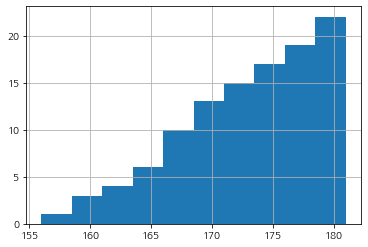

In [144]:
#cumulative 속성
n, bins, patches = plt.hist(heights, bins=10, label='heigths', cumulative = True)
plt.grid(True)
plt.show()

cumulative를 사용하면 누적 그래프가 된다.

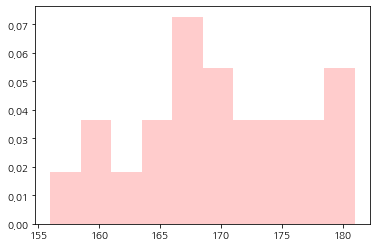

In [140]:
heights = [168, 181, 164, 156, 178, 174, 161,
           177, 166, 168, 159, 171, 180, 159,
           167, 181, 169, 173, 169, 174, 170,
           165]

plt.hist(heights, bins=10, label='heigths', density=True, alpha=0.2, color='red')
plt.show()

누적 밀도 함수를 미분하여 나온 도함수(derivative)를 확률 밀도 함수(probability density function)라고 한다.

## 도수다각형

히스토그램에서 사각형의 윗 변의 중점을 연결한 그림이다

*예시
- 히스토그램에서 사용한 데이터를 그대로 사용한다.